In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('robots_directives.csv')
df['URL'] = df['URL'].str.rstrip('\r\n')
df

,URL,User-agent,Directive,Path,Sitemap
0,http://www.nfcmag.com/robots.txt,*,Disallow,NaN,NaN
1,http://yc.ireader.com.cn/robots.txt,*,Disallow,/,NaN
2,http://yc.ireader.com.cn/robots.txt,*,Disallow,/static/js/,NaN
3,http://yc.ireader.com.cn/robots.txt,*,Disallow,/static/css/,NaN
4,http://yc.ireader.com.cn/robots.txt,*,Disallow,/static/images/,NaN
...,...,...,...,...,...
19938,https://www.huangshan8.com/robots.txt,*,Disallow,/bookmark/,NaN
19939,https://www.huangshan8.com/robots.txt,*,Disallow,/go/,NaN
19940,https://www.huangshan8.com/robots.txt,*,Disallow,/user,NaN
19941,https://www.huangshan8.com/robots.txt,*,Disallow,/hotnews,NaN


__User-agent词云图__

从这张图可以看出`Google bot`作为`User-agent`即使在国内也会被经常提到

In [3]:
from pyecharts import options as opts
from pyecharts.charts import WordCloud

df_filtered = df[df['User-agent'] != '*']
user_agent = df_filtered['User-agent'].value_counts().reset_index()
user_agent.columns = ['User-agent', 'Count']

# Generate word cloud
wordcloud = (
    WordCloud()
    .add(series_name="User Agent", data_pair=user_agent.values.tolist(), word_size_range=[20, 100])
    .set_global_opts(
        title_opts=opts.TitleOpts(title="User Agent Word Cloud"),
        tooltip_opts=opts.TooltipOpts(formatter="{b}: {c}"),
    )
)

wordcloud.render_notebook()

__查看各类型的`user agent`与`Path`的设置情况__

###### 从这张Hex图可以看出大部分网站两项指标都集中在较低的区域
###### 可以看出大部分网站都不会特意去划分不同的User agent能够爬取不同的路径内容

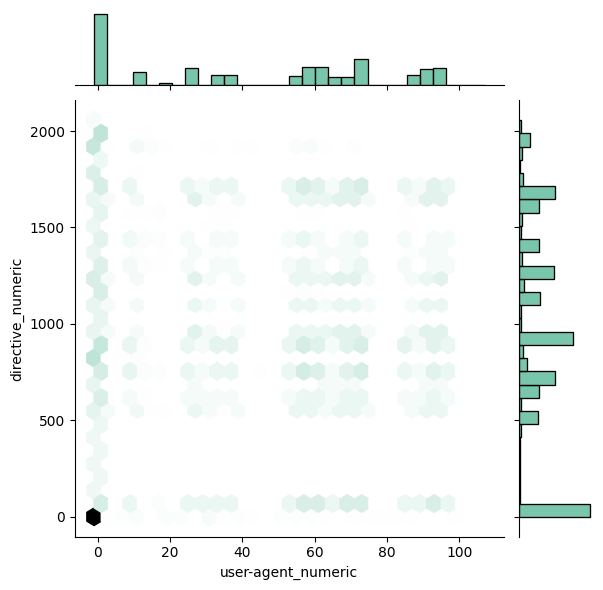

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df['user-agent_numeric'] = df['User-agent'].astype('category').cat.codes
df['directive_numeric'] = df['Path'].astype('category').cat.codes

sns.jointplot(data=df, x='user-agent_numeric', y='directive_numeric', kind="hex", color="#4CB391", marginal_kws=dict(bins=30, fill=True))

plt.show()

__从最完善的到最粗糙的robots协议__

###### https://product.pconline.com.cn/robots.txt 这个网站拥有436行的协议内容，有着近乎偏执的执着，几乎把所有的都标注了`disallow`

###### https://www.nfcmag.com/robots.txt          而这个网站只在robots协议里面写了`disallow:`，甚至还没有来得及把路径填上去

In [5]:
from pyecharts.charts import Scatter
import pyecharts.options as opts
url_counts = df['URL'].value_counts()
url_counts = url_counts[~url_counts.index.str.contains('lianjia')]

bubble_chart = (
    Scatter()
    .add_xaxis(url_counts.index.tolist())
    .add_yaxis("URL Count", url_counts.values.tolist(), label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="URL Occurrences"),
        xaxis_opts=opts.AxisOpts(),
        yaxis_opts=opts.AxisOpts(name="lines"),
    )
    .render_notebook()
)

bubble_chart


__被标注allow次数最多的User-agent__

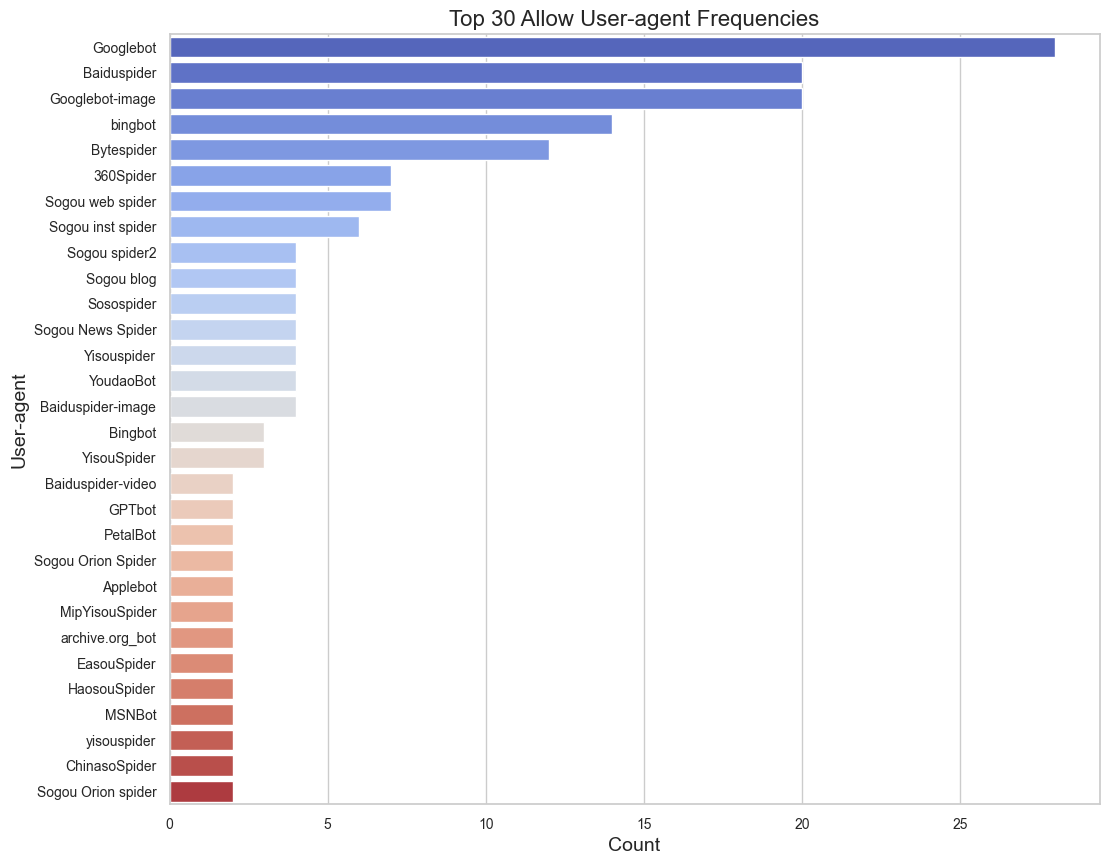

In [6]:
df_filtered = df[df['User-agent'] != '*']
df_filtered = df_filtered[df_filtered['Directive'] == 'Allow']
user_agent_counts = df_filtered['User-agent'].value_counts().reset_index()
user_agent_counts.columns = ['User-agent', 'Count']

top_user_agents_allow = user_agent_counts.head(30)

plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

sns.barplot(x='Count', y='User-agent', data=top_user_agents_allow, palette='coolwarm')

plt.title('Top 30 Allow User-agent Frequencies', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('User-agent', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

__被标注Disallow次数最多的User-agent__

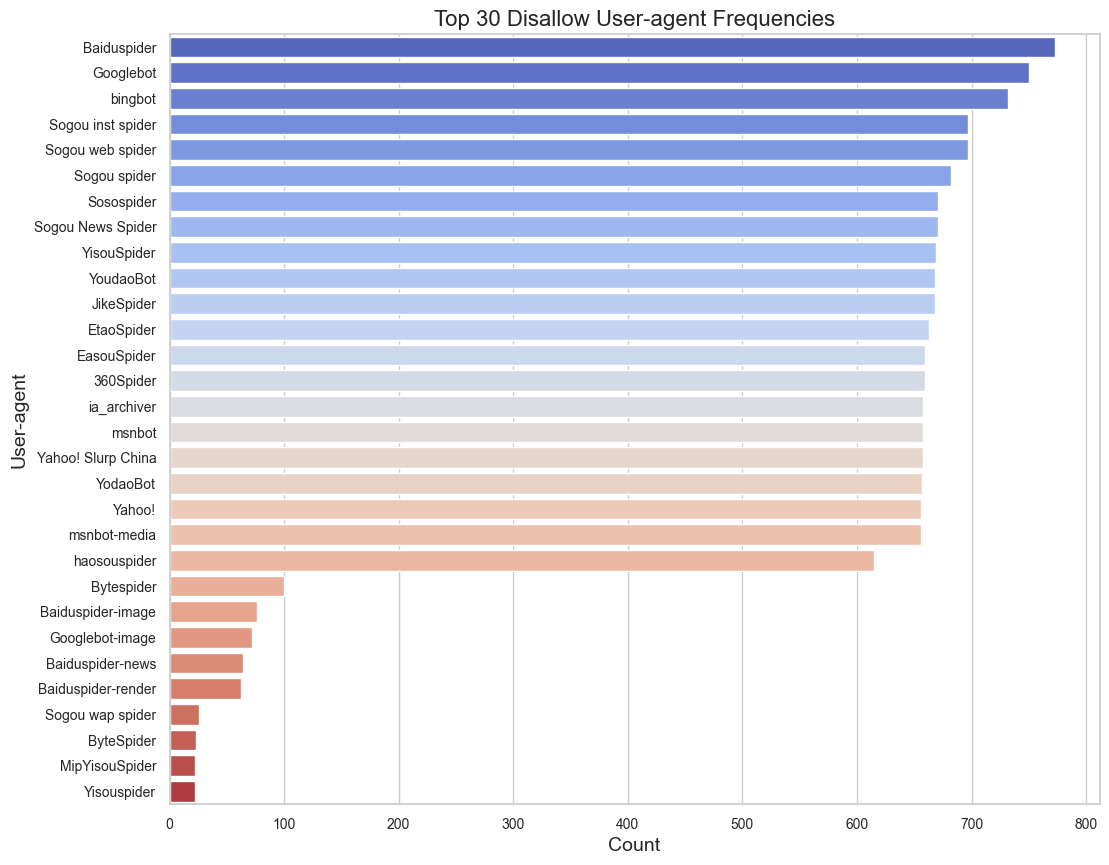

In [7]:
df_filtered = df[df['User-agent'] != '*']
df_filtered = df_filtered[df_filtered['Directive'] == 'Disallow']
user_agent_counts = df_filtered['User-agent'].value_counts().reset_index()
user_agent_counts.columns = ['User-agent', 'Count']

top_user_agents_disallow = user_agent_counts.head(30)

plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

sns.barplot(x='Count', y='User-agent', data=top_user_agents_disallow, palette='coolwarm')

plt.title('Top 30 Disallow User-agent Frequencies', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('User-agent', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()